## Notebook To Display Interactive Time Series for CO2 Data
Elena Reinisch, 2018-09-11

In [1]:
# start with same libraries as vector tutorial
%matplotlib inline

from __future__ import (absolute_import, division, print_function)
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

In [2]:
co2_data_table = pd.read_excel("../data/co2.xlsx", skiprows=range(1, 2))

In [3]:
co2_data_table.head()

,Reference,Site Type,Latitude,Longitude,DateTime,Altitude,Discharge,Stream Slope,Width,Depth,...,Water Temperature,Air Temperature,DO,Chl a,CO2,k,k600,CO2 Flux,CO2 Flux.1,Source
0,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,26.0,28.1,NaN,NaN,140.5,NaN,-18.104,1381.28,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-..."
1,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,26.0,28.1,NaN,NaN,140.5,NaN,-18.320,1267.75,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-..."
2,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,26.0,28.1,NaN,NaN,140.5,NaN,-35.512,1449.39,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-..."
3,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,26.0,28.1,NaN,NaN,140.5,NaN,-20.488,1025.55,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-..."
4,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,26.0,28.1,NaN,NaN,140.5,NaN,-22.272,1411.55,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-..."


In [4]:
co2_data_table.dtypes

Reference             object
Site Type             object
Latitude             float64
Longitude            float64
DateTime              object
Altitude             float64
Discharge            float64
Stream Slope         float64
Width                float64
Depth                float64
Flow Velocity        float64
Wind Speed           float64
POC                  float64
DOC                  float64
TOC                  float64
pH                   float64
Water Temperature    float64
Air Temperature      float64
DO                   float64
Chl a                float64
CO2                  float64
k                    float64
k600                 float64
CO2 Flux             float64
CO2 Flux.1           float64
Source                object
dtype: object

### Build GeoPandas Data Frame

In [5]:
geometry = [Point(xy) for xy in zip(co2_data_table['Longitude'], co2_data_table['Latitude'])]

In [6]:
geometry = GeoSeries(geometry)
geometry.crs = {'init': 'epsg:4326'}
geometry.crs

{'init': 'epsg:4326'}

In [7]:
co2_geo_data_table = GeoDataFrame(co2_data_table, geometry=geometry)

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...


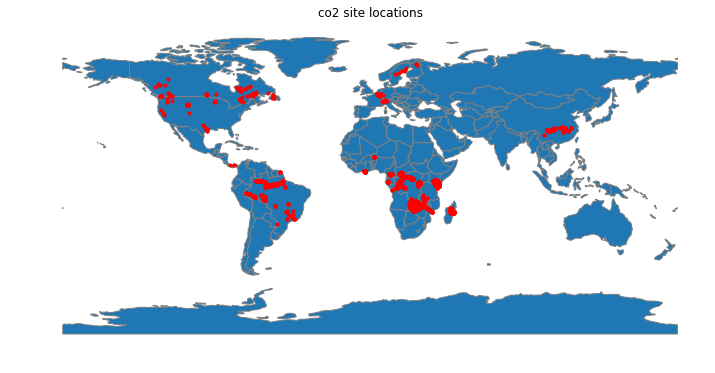

In [11]:
f, ax = plt.subplots(1, figsize=(12, 6))
ax.set_title('co2 site locations')
world.plot(ax=ax, edgecolor='gray')
co2_geo_data_table.plot(ax=ax, marker='.', color='r')
ax.set_ylim([-90, 90])
ax.set_axis_off()
plt.axis('equal');